In [1]:
import sys
import pathlib

ROOT = pathlib.Path(".").absolute().parent.parent
sys.path.append(str(ROOT))

import os
import numpy as np
from models.raw_audio import IncTSSDNetWrapper
from datasets.SPCUP22DataModule import SPCUP22DataModule

from utils.metrics import (
    plot_classification_report,
    pytorch_lightning_make_predictions as make_predictions,
    print_scores,
    plot_tsne_features
)

/home/iubnlp/anaconda3/envs/spcup/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### Change this according to your system

In [2]:
os.environ["CUDA_VISIBLE_DEVICES"] = "6"

### Without augmentations

In [3]:
checkpoint = IncTSSDNetWrapper.load_from_checkpoint(
    ROOT.joinpath("checkpoints", "tssdnet", "inc_tssdnet_with_unseen", "last.ckpt"),
    return_features=True
)

data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "raw_audio", "spcup22"),
    should_include_unseen_in_training_data=True,
    num_workers=8,
)

In [4]:
actual_labels, predictions, probabilities, _, final_layer_features = make_predictions(
    checkpoint, data_module, return_final_layer_features=True
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part1_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part2_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part2.zip]...
Predicting: 100%|██████████| 19/19 [00:02<00:00,  9.27it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:172: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [5]:
print_scores(actual_labels, predictions)


    F1 Score: 0.96
    Accuracy: 0.96
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

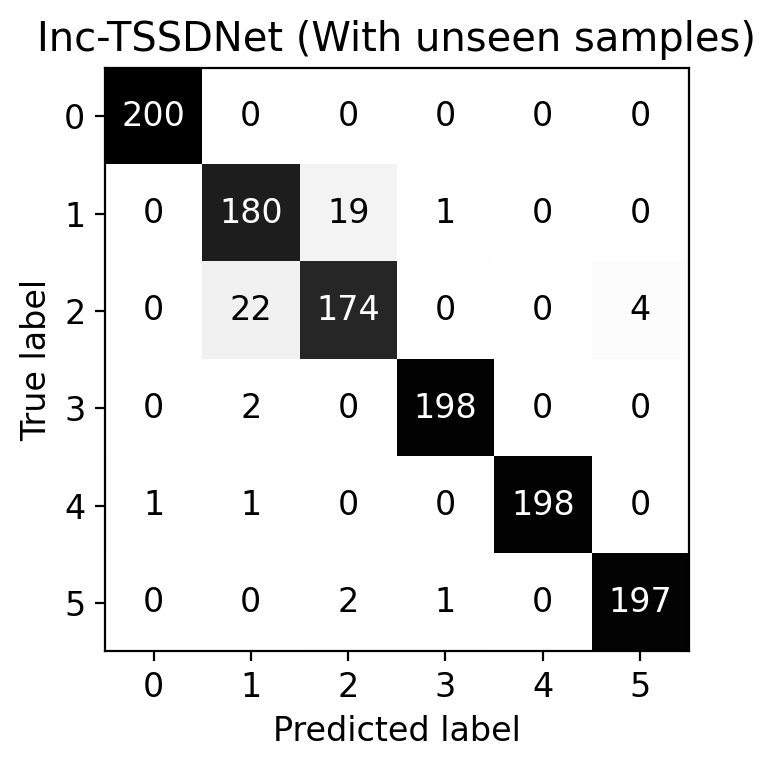

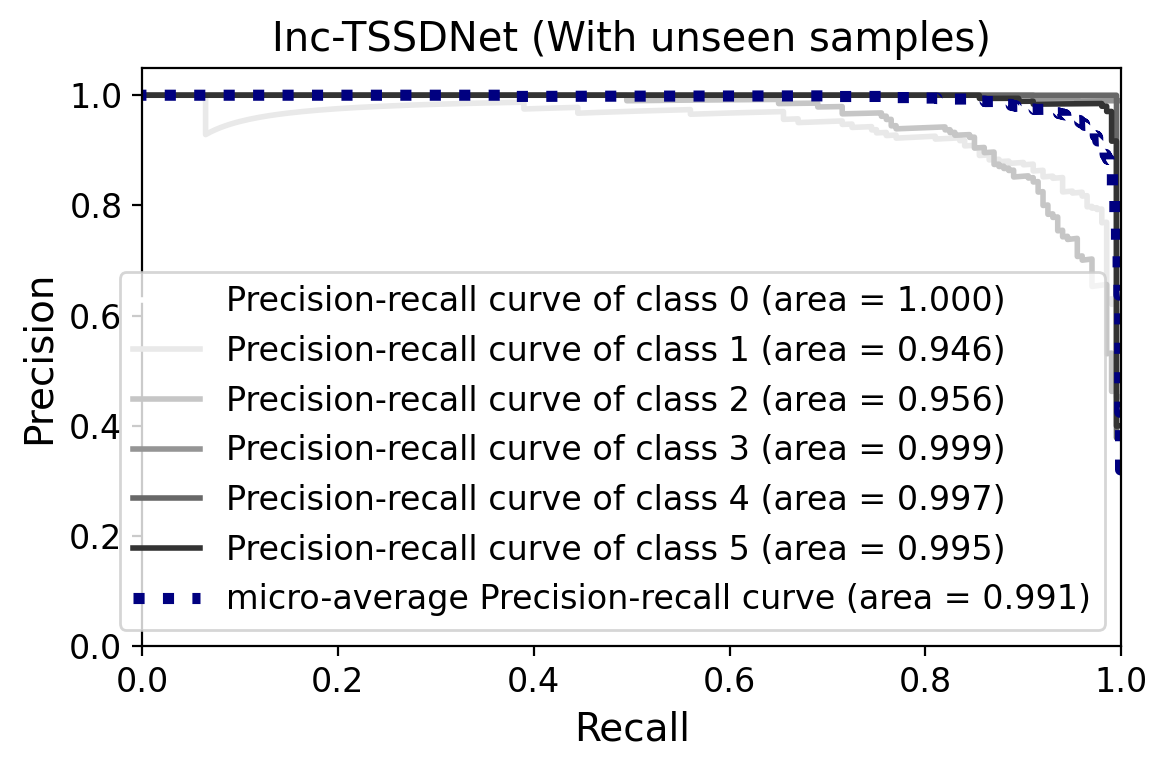

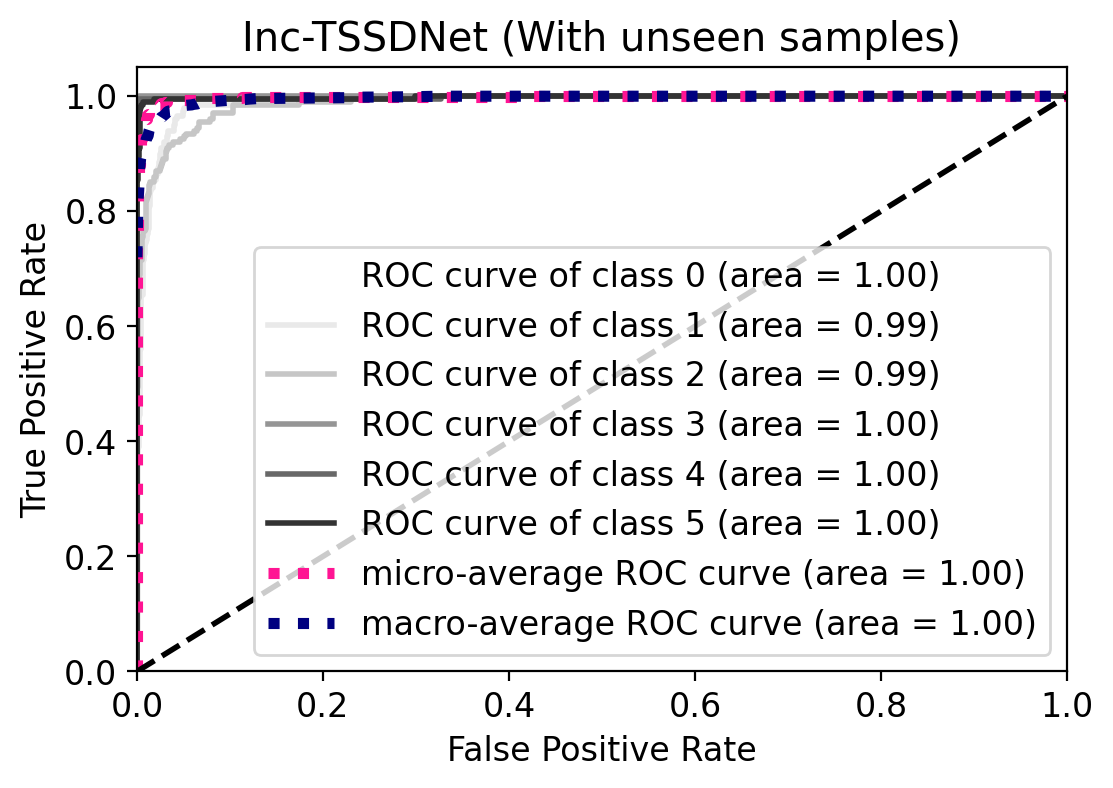

In [6]:
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "inc", "with_unseen"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Inc-TSSDNet (With unseen samples)",
    save_path=fig_save_path
)

/home/iubnlp/anaconda3/envs/spcup/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

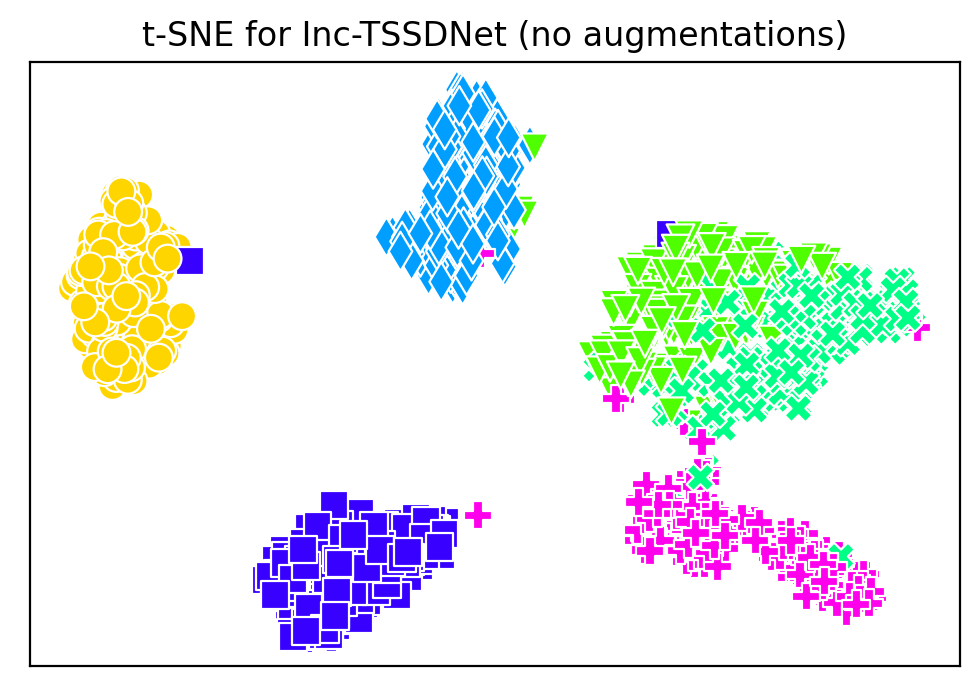

In [7]:
final_layer_features = np.array(final_layer_features, dtype=np.float32)

fig, ax = plot_tsne_features(
    final_layer_features,
    actual_labels,
    "t-SNE for Inc-TSSDNet (no augmentations)",
    use_grey=False
)

fig.savefig(
    ROOT.joinpath("results", "inc_tssdnet_no_aug.eps"),
    format="eps",
    bbox_inches="tight",
)

### With augmentations

In [8]:
checkpoint = IncTSSDNetWrapper.load_from_checkpoint(
    ROOT.joinpath("checkpoints", "tssdnet", "inc_tssdnet_with_unseen_aug", "last.ckpt"),
    return_features=True
)

data_module = SPCUP22DataModule(
    64,
    dataset_root=pathlib.Path(ROOT).joinpath("data", "raw_audio", "spcup22"),
    should_include_unseen_in_training_data=True,
    should_include_augmented_data=True,
    num_workers=8,
)

In [9]:
actual_labels, predictions, probabilities, _, final_layer_features = make_predictions(
    checkpoint, data_module, return_final_layer_features=True
);

GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [6]


Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_training_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_unseen.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part1_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/part2_aug.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part1.zip]...
Skipping downloading [/home/iubnlp/spcup22/SPCUP2022/data/raw_audio/spcup22/spcup_2022_eval_part2.zip]...
Predicting: 100%|██████████| 75/75 [00:06<00:00, 11.04it/s]


/home/iubnlp/spcup22/SPCUP2022/utils/metrics.py:172: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  softmax_probabilities = F.softmax(prediction)


In [10]:
print_scores(actual_labels, predictions)


    F1 Score: 1.00
    Accuracy: 1.00
    


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 432x288 with 0 Axes>

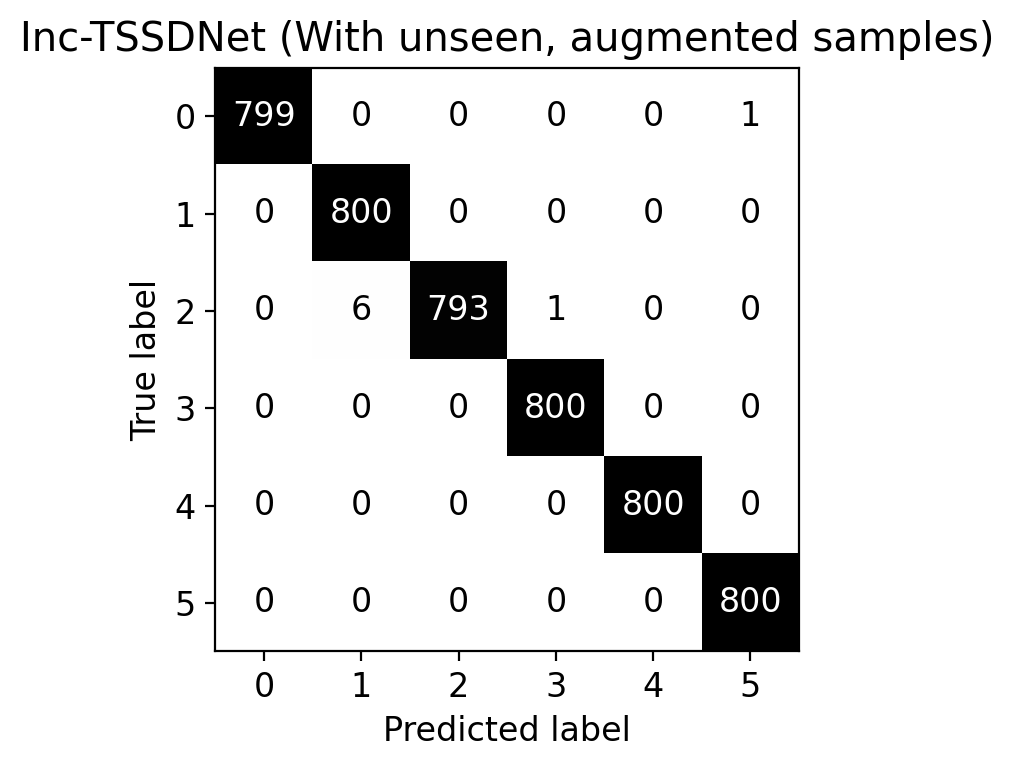

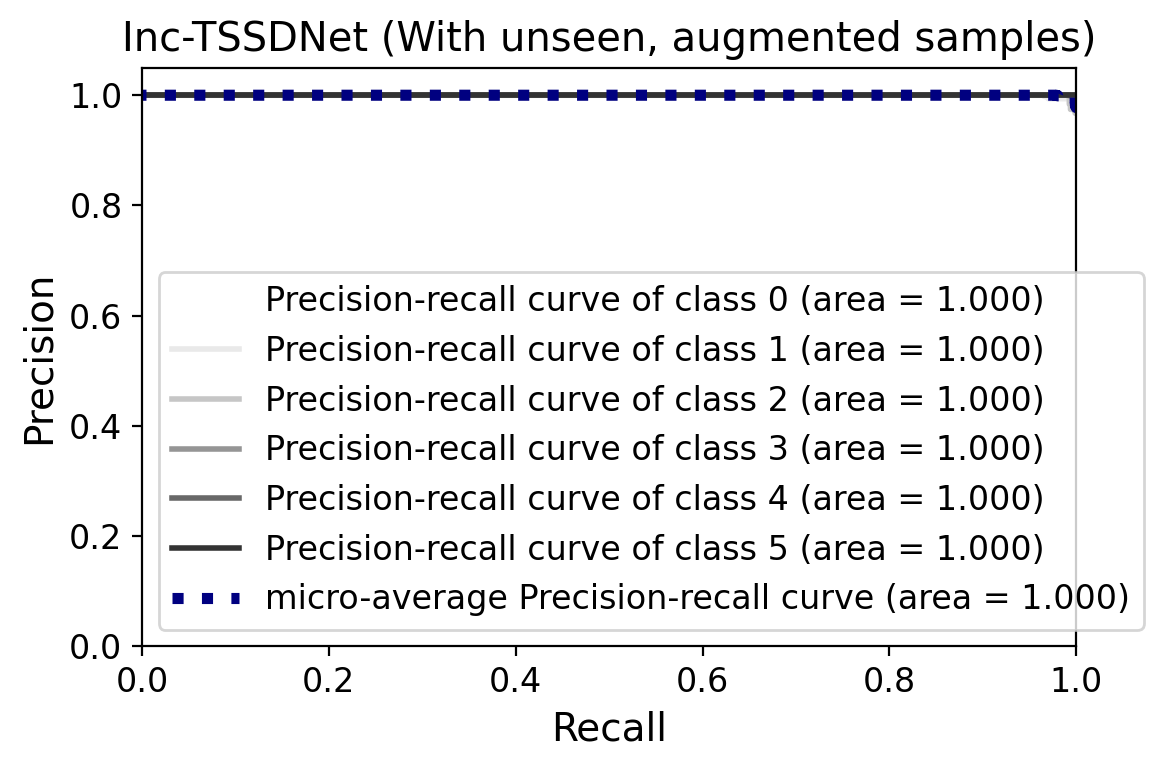

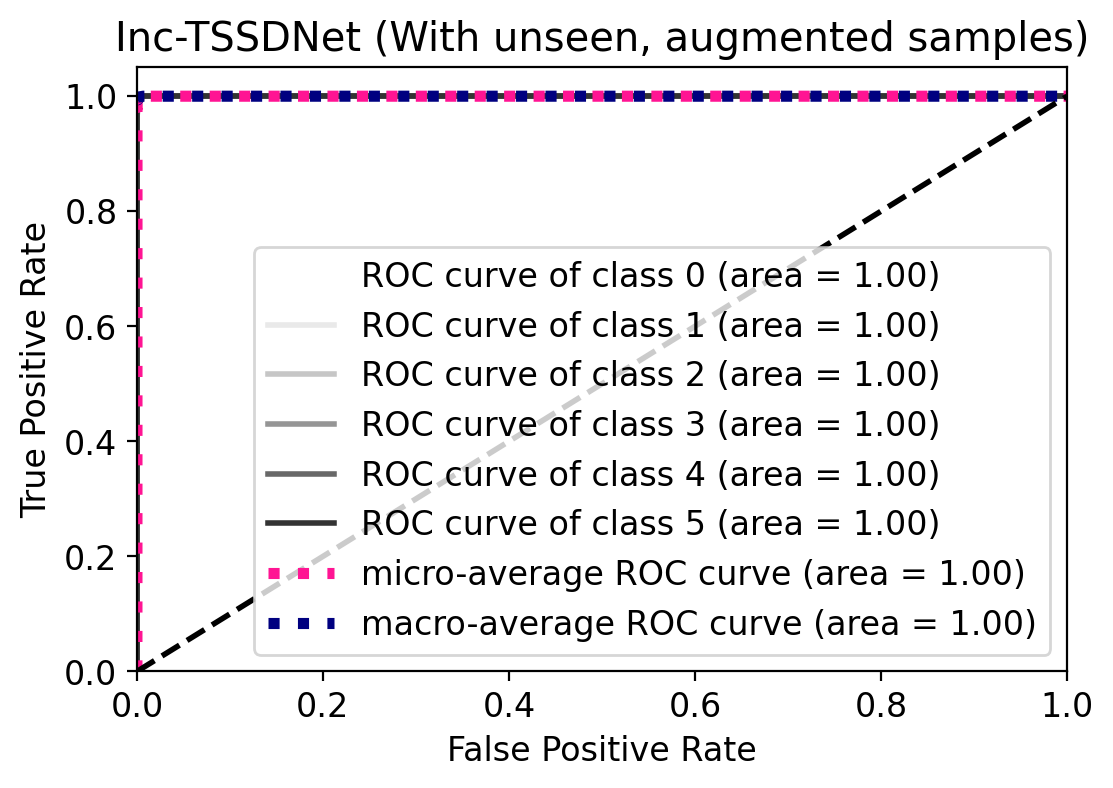

In [12]:
fig_save_path = str(ROOT.joinpath("results", "tssdnet", "inc", "with_unseen_aug"))
os.makedirs(fig_save_path, exist_ok=True)

plot_classification_report(
    actual_labels,
    predictions,
    probabilities,
    title_suffix="Inc-TSSDNet (With unseen, augmented samples)",
    save_path=fig_save_path
)

/home/iubnlp/anaconda3/envs/spcup/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


<Figure size 432x288 with 0 Axes>

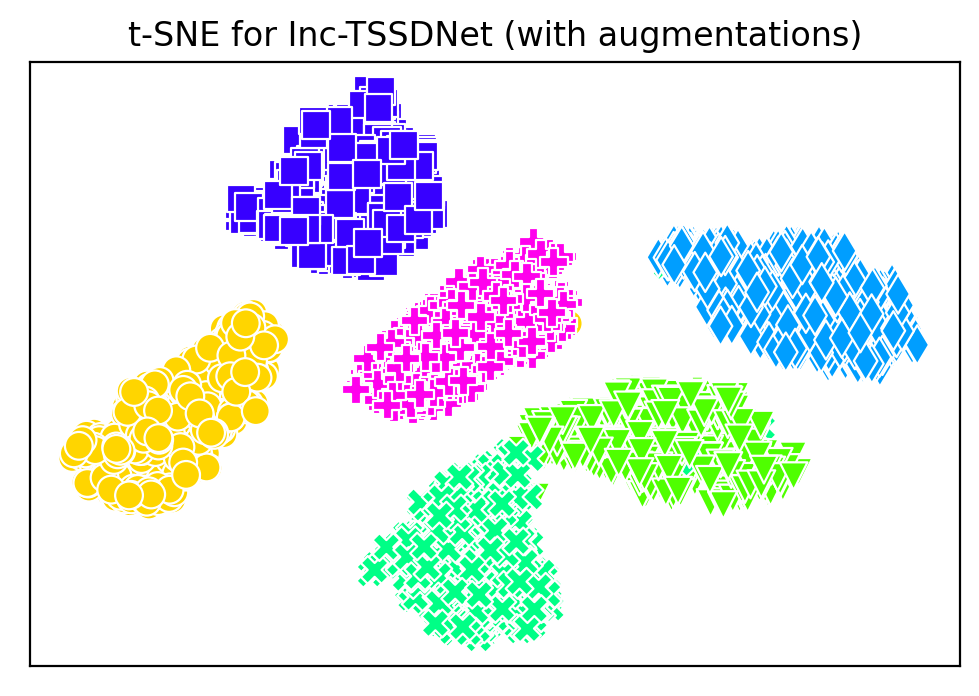

In [13]:
final_layer_features = np.array(final_layer_features, dtype=np.float32)

fig, ax = plot_tsne_features(
    final_layer_features,
    actual_labels,
    "t-SNE for Inc-TSSDNet (with augmentations)",
    use_grey=False
)

fig.savefig(
    ROOT.joinpath("results", "inc_tssdnet_aug.eps"),
    format="eps",
    bbox_inches="tight",
)